In [2]:
%matplotlib inline

import sys
import numpy as np
from scipy import sparse
import pandas as pd
from anndata import AnnData


import matplotlib.pyplot as plt
import scanpy as sc


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# Load data

In [3]:
#Read the processed matrix

#data with all PBMC cells
adata = sc.read_h5ad('data/PBMCs/PBMCs_all.h5ad')

#Data wil TNK subset clustered at giher resolution
adata_TNK= sc.read_h5ad('data/PBMCs/PBMC_TNK.h5ad')

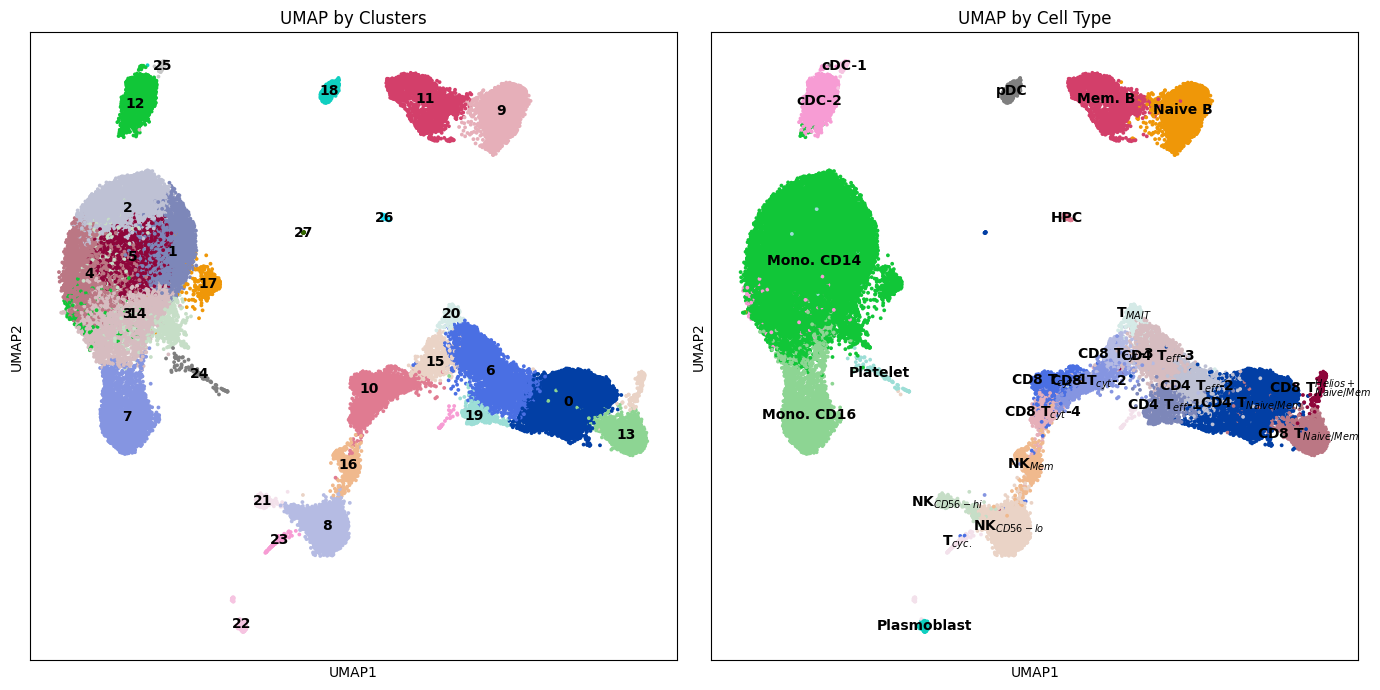

In [5]:

# Create a figure with multiple subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot UMAP with clusters
sc.pl.umap(adata, color='leiden', ax=ax1, size=10, show=False, title='UMAP by Clusters', legend_loc='on data', s = 30)

# Plot UMAP with cell types
sc.pl.umap(adata, color='cell_type_sub', size=10, ax=ax2, show=False, title='UMAP by Cell Type', legend_loc='on data', s= 30)

plt.tight_layout()
plt.show()

plt.close()


### Plot reembedded TNK cells

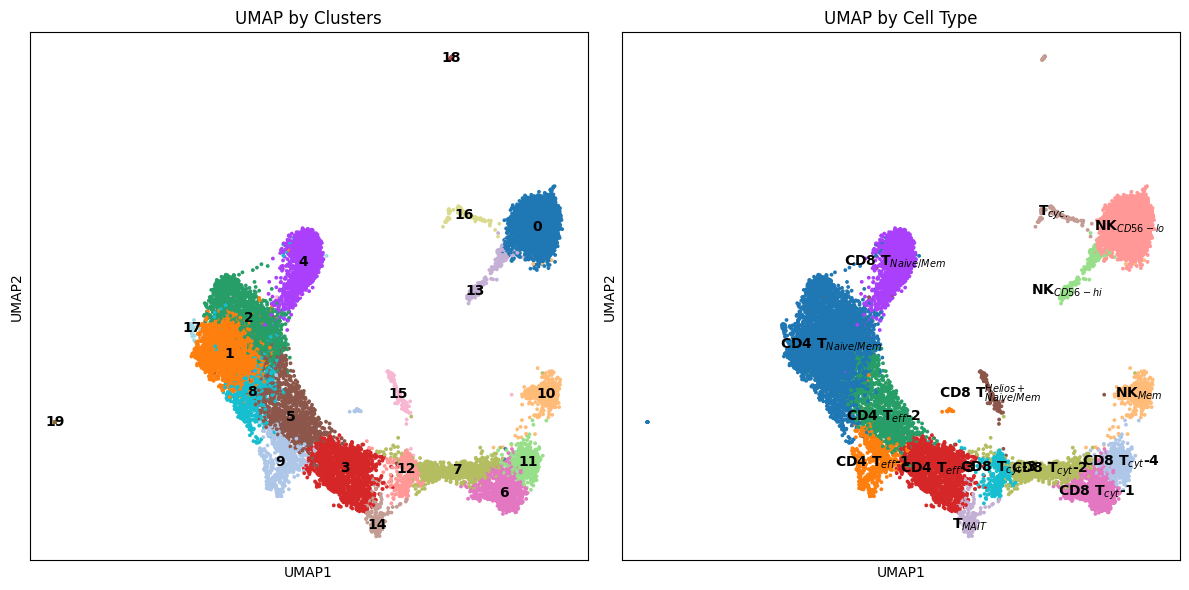

In [6]:
# Set figure size for all plots
sc.settings.figsize = (10, 10)

# Create a figure with multiple subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot UMAP with clusters
sc.pl.umap(adata_TNK, color='leiden', ax=ax1, size=10, show=False, title='UMAP by Clusters', legend_loc='on data', s=30)

# Plot UMAP with cell types
sc.pl.umap(adata_TNK, color='cell_type_sub', ax=ax2, show=False, title='UMAP by Cell Type', legend_loc='on data', s=30)

plt.tight_layout()
plt.show()

plt.close()


In [ ]:
## Plot the two separate UMAPS

In [7]:
#Gather barcodes not present in the TNK subest
other_cells = []
for bc in adata.obs_names.values:
    if bc not in adata_TNK.obs_names.values:
        other_cells.append(bc)
other_cells = np.array(other_cells)

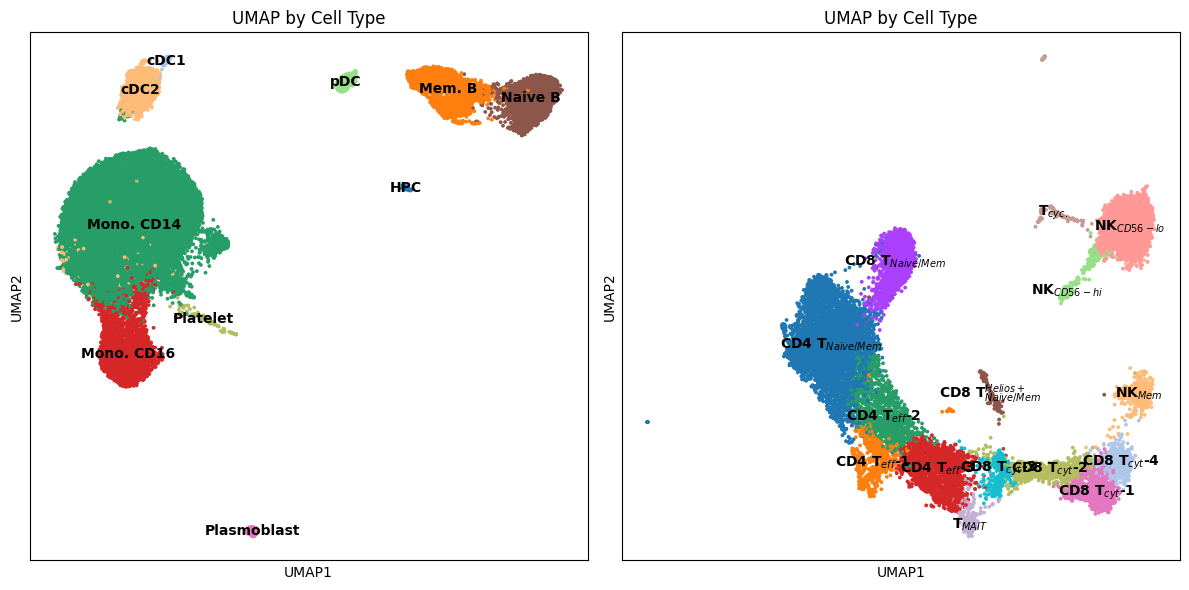

In [8]:

# Create a figure with multiple subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Plot UMAP with cell types
sc.pl.umap(adata[other_cells], color='cell_type_major', size=12, ax=ax1, show=False, title='UMAP by Cell Type', legend_loc='on data', s= 30)
# Plot UMAP with cell types
sc.pl.umap(adata_TNK, color='cell_type_sub', size=12, ax=ax2, show=False, title='UMAP by Cell Type', legend_loc='on data', s= 30)

plt.tight_layout()
plt.show()

plt.close()
